# D3 Visualização de Dados

## Carregando, explorando e limpando os dados

Abaixo segue um resumo dos detalhes da estrutura dos dados.

**Objetivo**

Após ter uma noção geral da planilha, tive a ideia de gerar em D3 quatro gráficos sobre quantidade de passageiros (entre vivos e mortos) por portão de embarque, utilizando basicamente as colunas _PassangerId_, _Embarked_, _Survived_ e _Pclass_. Para isso irei visualizar e explorar a planilha, identificando valores nulos que poderão impactar, ou não, no gráfico final e remover algumas colunas irrelevantes dos arquivos csv. 

In [11]:
import pandas as pd

# Primeiros registros da planilha
titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Últimos registros da planilha
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Exploração dos dados**

Nas próximas células iremos então identificar os dados de interesse.

In [13]:
# Percentual de valores nulos do total de registros
titanic_data.isnull().sum()/len(titanic_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

A análise das contagens nulas revelou para a coluna Age o percentual de 19% e Cabin 77%, ambas não serão utilizadas futuramente, sendo assim, não faz diferença essa porcentagem grande de nulos. 

Abaixo pensei em verificar melhor a coluna Embarked (contagem de nulos).

In [14]:
print "Contagem da porta de embarque nula: ", titanic_data["Embarked"].isnull().sum()

Contagem da porta de embarque nula:  2


Decidi excluir as colunas que certamente não serão necessárias no primeiro momento. 

In [15]:
titanic_data.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], 
                  axis=1, inplace=True)

titanic_data.head()

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S


Assim como na descrição logo no início, vemos que o Titanic possuía 3 portas de embarque; C = Cherbourg, Q = Queenstown e S = Southampton.

In [17]:
print(titanic_data['Embarked'].unique())

['S' 'C' 'Q' nan]


Como vimos mais acima, a coluna _Embarked_ possui só 2 valores inexistentes. Vamos preencher a coluna com a moda, ou seja, o valor que mais ocorre nesta coluna. O fillna(), por padrão, retorna um novo objeto e o argumento inplace = True modifica o objeto original. Vejamos.

In [18]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

# Verificar se colunas Age e Embarked ainda possuem valores inexistentes
print(titanic_data.isnull().any())

Survived    False
Embarked    False
dtype: bool


Neste ponto substituirei o 0 e 1 da coluna _Survived_, pela forma escrita survived e died.

In [19]:
titanic_data.Survived.replace([1, 0], ['survived', 'died'], inplace=True)
titanic_data.head()

,Survived,Embarked
0,died,S
1,survived,C
2,survived,S
3,survived,S
4,died,S


Logo abaixo criarei uma tabela de frequência usando a função pd.crosstab (). A função constrói um novo dataframe de contagens de variáveis com base nas matrizes fornecidas. Será feito uma tabela unidirecional da variável _Survived_ de acordo com as portas de embarque.

In [20]:
survived_count = pd.crosstab(titanic_data['Embarked'], titanic_data['Survived'])
survived_count

Survived,died,survived
Embarked,,
C,75,93
Q,47,30
S,427,219


Então será dividido exatamente o número de sobreviventes e mortos por portão de embarque. Aproveitarei também para renomear as colunas.

In [3]:
data = {
'Embarked': ['C', 'C', 'Q', 'Q', 'S', 'S'],
'People': ['survived', 'died', 'survived', 'died', 'survived', 'died'],
'Amount': [93, 75, 30, 47, 219, 427]
}

titanic_data = pd.DataFrame(data, columns=['Embarked','People','Amount'])
titanic_data

,Embarked,People,Amount
0,C,survived,93
1,C,died,75
2,Q,survived,30
3,Q,died,47
4,S,survived,219
5,S,died,427


Por fim, será gerado o arquivo csv para os 2 primeiros gráficos.

In [4]:
titanic_data.to_csv('d3_1.csv', sep=',', index=False)

E abaixo a representação de um gráfico de barras horizontais, cujo qual será meu segundo gráfico em D3.

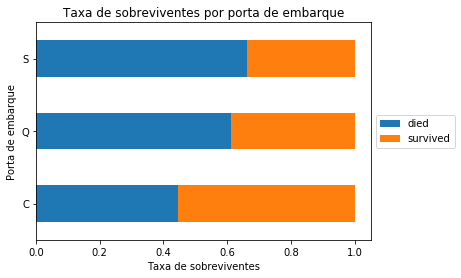

In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt

survived_count_emb = \
    survived_count.div(survived_count.sum(1).astype(float), axis = 0)
survived_count_emb.plot(kind='barh', stacked=True)
plt.title('Taxa de sobreviventes por porta de embarque')
plt.ylabel('Porta de embarque')
plt.xlabel('Taxa de sobreviventes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Para o terceiro e o quarto gráfico irei carregar novamente a planilha para utilizar as colunas _PassengerId_ e _Pclass_.

In [24]:
# Primeiros registros da planilha
titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Como visto, a coluna _Embarked_ possui 2 valores inexistentes e será preenchido com a moda novamente.

In [25]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

# Verificar se colunas Age e Embarked ainda possuem valores inexistentes
print(titanic_data.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


Farei algumas formatações nas colunas de interesse.

In [26]:
# Substituir dados da coluna Embarked
titanic_data.Embarked.replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'], inplace=True)

# Substituir nomes das colunas PassengerId, Pclass, Embarked e Sex
titanic_data.rename(columns={'PassengerId': 'Passenger', 'Pclass': 'Class', 'Sex': 'Gender'}, inplace=True)
titanic_data.head()

,Passenger,Survived,Class,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


Verificarei algumas porcentagens que farão parte da história contada no gráfico.

In [27]:
# Quantidade de homens e mulheres por porta de embarque
gender_count = pd.crosstab(titanic_data['Embarked'], titanic_data['Gender'])
gender_count

Gender,female,male
Embarked,,
Cherbourg,73,95
Queenstown,36,41
Southampton,205,441


In [32]:
# Porcentagem de homens com relação a mulheres em Southampton
def percent(num1, num2):
    num1 = float(441)
    num2 = float(646)
    percentage = '{0:.2f}'.format((num1 / num2 * 100))
    return percentage
print percent(441, 646)

68.27


In [35]:
# Porcentagem de embarque em Southampton com relação ao total
def percent(num1, num2):
    num1 = float(646)
    num2 = float(891)
    percentage = '{0:.2f}'.format((num1 / num2 * 100))
    return percentage
print percent(646, 891)

72.50


Por fim, será gerado o arquivo csv para os gráficos finais.

In [31]:
titanic_data.to_csv('d3_2.csv', sep=',', index=False)

# Referências Bibliográficas

http://felipegalvao.com.br/blog/2016/02/29/manipulacao-de-dados-com-python-pandas/

https://github.com/jocelyn-ong/data-science-projects/blob/master/ga-dsi-weekly-projects/project-5-titanic.ipynb
    
https://github.com/nglgzz/titanic/blob/master/titanic.ipynb

http://bl.ocks.org/Meschreiber/raw/5188e038c6360268a43d2f47dafc8835/

https://en.wikipedia.org/wiki/RMS_Titanic